In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
df = pd.read_csv("E:\\BE LPIII practicals\\bank.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df = df.drop(["RowNumber","CustomerId","Surname"], axis=1)

In [5]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [6]:
X = pd.get_dummies(X, columns=["Geography","Gender"],drop_first=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
model = keras.Sequential([
    layers.Dense(units=128, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(X_train, y_train, epochs=3, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/3
80/80 [==============================] - 2s 9ms/step - loss: 0.4553 - accuracy: 0.8046 - val_loss: 0.4186 - val_accuracy: 0.8300
Epoch 2/3
80/80 [==============================] - 0s 5ms/step - loss: 0.3924 - accuracy: 0.8376 - val_loss: 0.3824 - val_accuracy: 0.8445
Epoch 3/3
80/80 [==============================] - 0s 5ms/step - loss: 0.3599 - accuracy: 0.8518 - val_loss: 0.3643 - val_accuracy: 0.8575


In [19]:
predictions = (model.predict(X_test) > 0.5).astype(np.int32)

63/63 [==============================] - 0s 2ms/step


In [20]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


In [21]:
conf_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix: ")
print(conf_mat)

Confusion Matrix: 
[[1525   70]
 [ 215  190]]


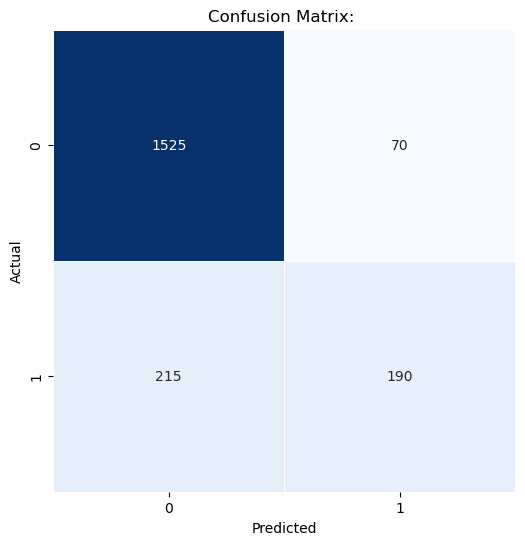

In [22]:
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True, cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: ")
plt.show()